### Is there a gender balance for developer characteristics?
1. What is the gender proportion for developers?
2. Are there professional differences between men and women?
3. As a developer, are women as satisfied with their jobs as men?
4. How does gender affect salary?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('Dataset/2017/survey_results_public.csv')
df_schema = pd.read_csv('Dataset/2017/survey_results_schema.csv')

In [4]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


> To answer the questions posed we will use the survey dataset of stackoverflow 2017. __[Stackoverflow Survey 2017](https://www.kaggle.com/datasets/stackoverflow/so-survey-2017)__

In [6]:
def get_description(col, df_schema):
  '''
  INPUT - schema - pandas dataframe with the schema of the developers survey
          col - string - the name of the column you would like to know about
  OUTPUT - 
          desc - dict - the description of the column
  '''
  try:
    return {col :list(df_schema[df_schema['Column'] == col]['Question'])[0]}
  except:
    return {col : "No result"}

In [7]:
def show_description(cols, schema):
  '''
  INPUT - schema - pandas dataframe with the schema of the developers survey
          cols - list - list of the name of the column you would like to know about
  '''
  for col in cols:
    print(get_description(col, schema))

> List columns is used for analysis 

In [8]:
list_cols = ['Professional', 'ProgramHobby', 'JobSatisfaction', 'Salary', 'Gender']

> View description of each column

In [9]:
show_description(list_cols, df_schema)

{'Professional': 'Which of the following best describes you?'}
{'ProgramHobby': 'Do you program as a hobby or contribute to open source projects?'}
{'JobSatisfaction': 'Job satisfaction rating'}
{'Salary': 'What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?'}
{'Gender': 'Which of the following do you currently identify as?'}


> Overview data and check null

In [10]:
def get_col_info(col, df):
  '''
  INPUT - df - pandas dataframe with the data of the developers survey
          col - string - the name of the column you would like to know about
  OUTPUT - 
          info - dict - the information of the column with type and unique value for categorical column and check Nan for quantitative column
  '''
  if df[col].dtype == 'O':
    unique_data = list(df[col].unique())
    return {"type" : str(df[col].dtype), "category_count": len(unique_data), "data" : unique_data}
  else:
    return {"type" : str(df[col].dtype), "null_value_count" : df[col].isnull().values.sum()}


In [11]:
for col in list_cols:
  print({col: get_col_info(col, df)})

{'Professional': {'type': 'object', 'category_count': 5, 'data': ['Student', 'Professional developer', 'Professional non-developer who sometimes writes code', 'Used to be a professional developer', 'None of these']}}
{'ProgramHobby': {'type': 'object', 'category_count': 4, 'data': ['Yes, both', 'Yes, I program as a hobby', 'No', 'Yes, I contribute to open source projects']}}
{'JobSatisfaction': {'type': 'float64', 'null_value_count': 11016}}
{'Salary': {'type': 'float64', 'null_value_count': 38501}}
{'Gender': {'type': 'object', 'category_count': 30, 'data': ['Male', nan, 'Female', 'Gender non-conforming', 'Other', 'Male; Gender non-conforming', 'Female; Transgender', 'Male; Female', 'Male; Other', 'Transgender', 'Transgender; Gender non-conforming', 'Female; Gender non-conforming', 'Male; Female; Transgender; Gender non-conforming; Other', 'Male; Female; Transgender', 'Male; Female; Other', 'Male; Female; Transgender; Gender non-conforming', 'Male; Transgender', 'Female; Transgender; 

### 3.Prepare Data

1. **`Gender`** We have 30 categories for gender. We need custom gender to Male, Female, Transgender, Other with following rules:
  - `Male` for records only contain `Male`
  - `Female` for records only contain `Female`
  - `Transgender` for records contain `Transgender`
  - `Other` for the rest

2. **`Professional`** not change

3. **`ProgramHobby`** not change

4. **`JobSatisfaction`** Drop Null values. When Used to answer question number 3  

5. **`Salary`** Drop Null values. When Used to answer question number 4


In [12]:
def preprocessing_data(df, columns, cols_dropna = [], ignore_col = False):
  '''
  INPUT - df - pandas dataframe with the data of the developers survey
          columns - list - list of the name of the column you would like to know about
          cols_dropna - list -  list of the name of the column you will drop null values by row
          ignore_col - boolean - whether or not to ignore handling 'Gender' column 
  OUTPUT - 
          df_new - DataFrame - pandas dataframe with the data after preprocessing
  '''
  df_new = df[columns]
  for col in columns:
    if (col == 'Gender') & (ignore_col == False):
      mark_transgender = df_new[col].str.contains('Transgender', na=False)
      df_new.loc[mark_transgender, col] = 'Transgender'
      mark_order = ~((df[col] == 'Male' )| (df[col] == 'Female' )| (df[col] == 'Transgender'))
      df_new.loc[mark_order, col] = 'Other'
  if cols_dropna != []:
    df_new.dropna(subset = cols_dropna, inplace = True)
  return df_new

In [13]:
df_new = preprocessing_data(df, list_cols, cols_dropna = [], ignore_col = False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Results
1. What is the gender proportion for developers?
> After processing the data, this is a relatively easy question. We just need to count the number of items using the gender column. Here we will create a column chart to visualize the data

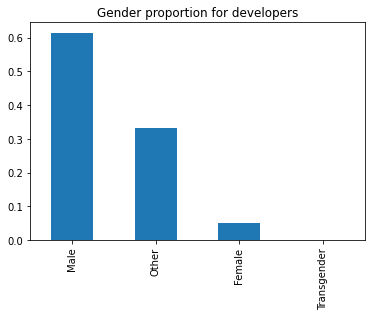

In [14]:
def gender_proportion_bar(df, title='Gender proportion for developers', plot=True):
    '''
    INPUT 
        df - a dataframe holding the Gender column
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        props_gender_df - a dataframe with the proportion of each gender category
        Displays a plot of pretty things related to the Gender column.
    '''
    gender_df = df['Gender'].value_counts()
    if plot:
        (gender_df/len(df)).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_gender_df = gender_df/len(df)
    return props_gender_df
    
props_df = gender_proportion_bar(df_new)

In [15]:
props_df

Male           0.614668
Other          0.333671
Female         0.050592
Transgender    0.001070
Name: Gender, dtype: float64

> From the Gender proportion for Developers Chart,  we can notice that the gender proportion for developers has a huge disparity. Specifically: 
  1. Mostly male developers (61.4%).
  2. Only about 5.1% of the total survey respondents are female. This shows that the level of female interest in developers is not high.
  3. More than 33% of survey respondents do not want to reveal their gender or set a non-specific gender.
  4. There are developers who are transgender but very few.
  5. The proportion of female to male developers is 8.3%. This is equivalent to a technology company with 12 men, only 1 female in it.

> With such disparity in the number of developers between men and women. Will female developers lose out on qualifications or salary or do they feel satisfied with their work when they choose to be a developer? We will continue to search for the answer
2. Are there professional differences between men and women?

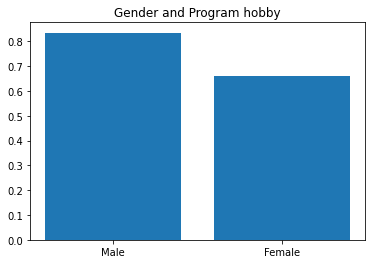

In [16]:
def count_bar(df, columns, gender_categories = ['Male','Female'], title = 'Gender and Program hobby', col_analysis = 'ProgramHobby', plot = False):
    '''
    INPUT 
        df - a dataframe holding the some columns you need
        columns - list - list of the name of the column you would like to know about
        gender_categories - gender categories for analysis you want
        title - string the title of your plot
        col_analysis - str - column mane will parse by gender
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        gender_df - a dataframe with the count of each gender category
        Displays a plot of pretty things related to the Professional column.
    '''
    gender = {'Gender': gender_categories}
    df_new = preprocessing_data(df, columns, cols_dropna = [col_analysis], ignore_col = True)

    if col_analysis == 'ProgramHobby':
      df_new['mark'] = df_new['ProgramHobby'] != 'No'
    elif col_analysis == 'Professional':
      df_new['mark'] = ((df['Professional'] == 'Professional developer') | (df['Professional'] == 'Used to be a professional developer'))

    gender['GenderCount'] = [len(df_new[df_new['Gender'] == gen]) for gen in gender['Gender']]
    gender['Count'] = [len(df_new[(df_new['Gender'] == gen) & (df_new['mark'] == True)]) for gen in gender['Gender']]
    gender['Proportion'] = np.array(gender['Count'])/np.array(gender['GenderCount'])
    gender_df = pd.DataFrame(gender)

    if plot:
        plt.bar(gender_df['Gender'],gender['Proportion']);
        plt.title(title); 
        plt.show()
    return gender_df

    
hobby_props_df = count_bar(df_new, list_cols, plot = True)

In [17]:
hobby_props_df

,Gender,GenderCount,Count,Proportion
0,Male,31589,26369,0.834753
1,Female,2600,1716,0.660000


> In general, being a developer for both men and women is usually based on their programming interests. However, this rate is very high in men (about 83%).

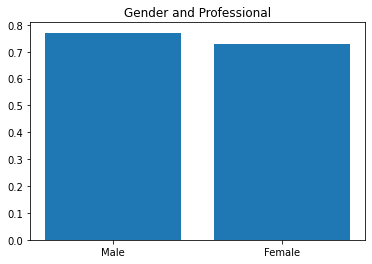

In [18]:
professtional_props_df = count_bar(df_new, list_cols, title = 'Gender and Professional',  col_analysis = 'Professional', plot = True)

In [19]:
professtional_props_df

,Gender,GenderCount,Count,Proportion
0,Male,31589,24351,0.770870
1,Female,2600,1894,0.728462


> Incredible. Although the percentage of women as a developer is much lower than that of men, it is not for that reason that they lose in terms of their skills and qualifications. The graph shows that the percentage of women who are professional developers or were once professional developers is almost equal to that of men (73% versus 77%). This means that once women have liked and chosen to become developers, they will be as professional as men.

### So, when women become developers, are they satisfied with their work?
- With question number 3, we also only focus on 2 genders male and female

In [20]:
def aggregate_bar(df, columns, gender_categories = ['Male','Female'], title = 'Gender and JobSatisfaction', col_analysis = 'JobSatisfaction', plot = False):
    '''
    INPUT 
        df - a dataframe holding the some columns you need
        columns - list - list of the name of the column you would like to know about
        gender_categories - gender categories for analysis you want
        title - string the title of your plot
        col_analysis - str - column mane will parse by gender
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        aggregate_df - a dataframe with the aggregate data, group by gender
        Displays a plot of pretty things related to the Professional column.
    '''
    gender = {'Gender': gender_categories}
    df_new = preprocessing_data(df, columns, cols_dropna = [col_analysis], ignore_col = True)
    df_new = df_new[df_new['Gender'].str.contains('|'.join(gender_categories))]
    aggregate_df = df_new.groupby(['Gender'])[col_analysis].mean().sort_values()

    if plot:
        (aggregate_df).plot(kind='bar', legend=None);
        plt.title(title); 
        plt.show()
    return aggregate_df

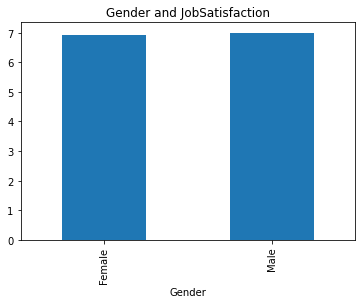

In [21]:
 job_satisfaction_df = aggregate_bar(df_new, list_cols, col_analysis = 'JobSatisfaction', plot = True)

In [22]:
 job_satisfaction_df

Gender
Female    6.936620
Male      7.004372
Name: JobSatisfaction, dtype: float64

> Like men, women's job satisfaction is also very high, at 7.0 and 6.9 points, respectively. This is true and it approximates their rate of programming love. We can say that most people who love programming will feel quite satisfied with their work

### With the above information, do you think the average salary of men and women is different? Let's check together.
4. How does gender affect salary?

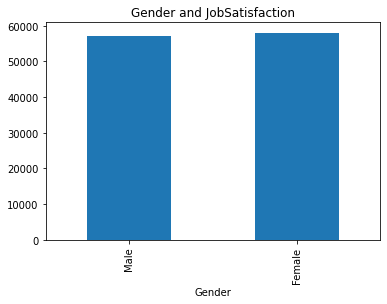

In [23]:
salary_df = aggregate_bar(df_new, list_cols, col_analysis = 'Salary', plot = True)

In [24]:
salary_df

Gender
Male      56996.494293
Female    58083.924534
Name: Salary, dtype: float64

> Wow, Unexpectedly, the average salary of women is as high as that of men and even slightly better (58083.90 vs 56996.5). It shows that paying a developer does not depend on gender but on their actual ability.

### Summary
> With the questions asked, we can conclude that becoming a developer is a very picky field for women. There are very few women becoming developers. However, the capacity of female developers is very high, and their remuneration is also commensurate.


### Discuss
> The next question is whether the number of female developers will increase in the future? and with their capabilities, how can we attract more women to become developers? Please comment on this.